In [31]:
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
def load_data(DATASET_PATH):
    return pd.read_csv(DATASET_PATH)

In [19]:
DATASET_PATH = './archive/2015.csv'
dataset = load_data(DATASET_PATH)
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [21]:
#functions
def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

def fillNaN_median(dataframe, key):
    median = dataframe[key].median()
    dataframe[key].fillna(median, inplace = True)
    return 

def one_hot_encode(dataframe, col_name):
    dataframe = pd.get_dummies(dataframe, columns=[col_name], prefix = [col_name])
    return dataframe


In [29]:
dataset.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [34]:
dataset.loc[dataset['Happiness Score'] < 5, 'Happiness Score'] = 0
dataset.loc[dataset['Happiness Score'] >= 5, 'Happiness Score'] = 1

In [36]:
chosen_columns = ["Happiness Score","Family", "Health (Life Expectancy)"]
happiness = dataset.filter(chosen_columns)
happiness.head()

,Happiness Score,Family,Health (Life Expectancy)
0,1.0,1.34951,0.94143
1,1.0,1.40223,0.94784
2,1.0,1.36058,0.87464
3,1.0,1.33095,0.88521
4,1.0,1.32261,0.90563


In [48]:
X_train, X_test, y_train, y_test = train_test_split(happiness.drop("Happiness Score", axis=1), happiness["Happiness Score"])

In [52]:
x_dev = X_train.values
y_dev = y_train.values
x_t = X_test.values
y_t = y_test.values

In [54]:
sc = StandardScaler()

x_dev = sc.fit_transform(x_dev)
x_t = sc.fit_transform(x_t)

In [58]:
svm_clf = SVC(kernel = "linear")
svm_clf.fit(x_dev, y_dev)

SVC(kernel='linear')

In [61]:
pred = svm_clf.predict(x_t)

In [65]:

np.mean((pred - y_t)**2)

0.175

/var/folders/_w/dyc83mgj39g824kzq8c4hc9w0000gn/T/ipykernel_18784/3861412901.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xs[ys==j,0],xs[ys==j,1],


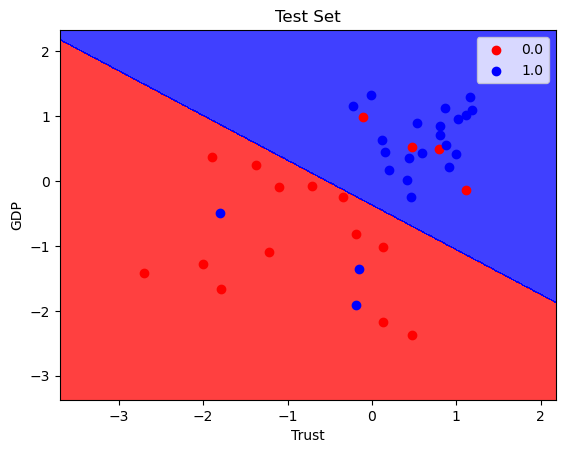

In [73]:
xs, ys = x_t, y_t

X1, X2 = np.meshgrid(np.arange(start = xs[:,0].min() - 1,stop = xs[:,0].max() + 1,step = 0.01),
                     np.arange(start = xs[:,1].min() - 1,stop = xs[:,1].max() + 1,step = 0.01))

plt.contourf(X1,X2, svm_clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(['r','b']))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i, j in enumerate(np.unique(ys)):
    plt.scatter(xs[ys==j,0],xs[ys==j,1],
                c=ListedColormap(['r','b'])(i),label = j)

plt.title('Test Set')
plt.xlabel('Trust')
plt.ylabel('GDP')
plt.legend()
plt.show()